In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('US_Accidents_March23.csv', nrows = 3000000)

In [2]:
df.drop(['ID','Source','Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng',
        'Description','Street','Country','Timezone','Airport_Code','Weather_Timestamp','Turning_Loop'], axis=1, inplace=True)

In [3]:
df.sample(5)

,Severity,Distance(mi),City,County,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2427752,3,1.28,Houston,Harris,TX,77029,75.9,NaN,94.0,29.91,6.0,SSE,6.9,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
172192,2,0.01,Des Plaines,Cook,IL,60018-3306,39.9,33.9,97.0,30.02,1.5,SE,9.2,0.0,Light Drizzle,False,False,True,False,False,False,True,False,False,False,False,True,Day,Day,Day,Day
2118884,2,0.00,Charlotte,Mecklenburg,NC,28210-4653,94.0,94.0,33.0,29.07,10.0,SW,7.0,0.0,Fair,False,False,True,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day
731872,2,0.00,Prattville,Elmore,AL,36066,55.0,55.0,81.0,29.88,10.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2316162,3,0.00,Centreville,Fairfax County,VA,20121,35.1,24.8,64.0,29.95,10.0,WNW,17.3,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


In [4]:
df.shape

(3000000, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Distance(mi)           float64
 2   City                   object 
 3   County                 object 
 4   State                  object 
 5   Zipcode                object 
 6   Temperature(F)         float64
 7   Wind_Chill(F)          float64
 8   Humidity(%)            float64
 9   Pressure(in)           float64
 10  Visibility(mi)         float64
 11  Wind_Direction         object 
 12  Wind_Speed(mph)        float64
 13  Precipitation(in)      float64
 14  Weather_Condition      object 
 15  Amenity                bool   
 16  Bump                   bool   
 17  Crossing               bool   
 18  Give_Way               bool   
 19  Junction               bool   
 20  No_Exit                bool   
 21  Railway                bool   
 22  Roundabout        

In [6]:
## Separating into cat, num, bool variables

df_cat = [i for i in df.columns if df[i].dtype=='object']
df_num = [i for i in df.columns if df[i].dtype!='object' and df[i].dtype != 'bool' and i!='Severity']
df_bool = [i for i in df.columns if df[i].dtype == 'bool']

In [7]:
df_cat

['City',
 'County',
 'State',
 'Zipcode',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [8]:
df_num

['Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [9]:
df_bool

['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal']

In [10]:
## Missing values in int

missing_percent_int = df[df_num].isnull().mean() * 100

missing_data_int = missing_percent_int[missing_percent_int > 0]
missing_data_int = missing_data_int.sort_values(ascending=False)

In [11]:
missing_data_int

Precipitation(in)    40.842433
Wind_Chill(F)        37.828400
Wind_Speed(mph)       9.288367
Visibility(mi)        1.867167
Humidity(%)           1.765600
Temperature(F)        1.643133
Pressure(in)          1.378833
dtype: float64

In [12]:
## Missing values in categorical

missing_percent_obj = df[df_cat].isnull().mean() * 100

missing_data_obj = missing_percent_obj[missing_percent_obj > 0]
missing_data_obj = missing_percent_obj.sort_values(ascending=False)

In [13]:
missing_data_obj

Weather_Condition        1.840000
Wind_Direction           1.616700
Sunrise_Sunset           0.055633
Civil_Twilight           0.055633
Nautical_Twilight        0.055633
Astronomical_Twilight    0.055633
Zipcode                  0.013733
City                     0.001867
County                   0.000000
State                    0.000000
dtype: float64

In [14]:
## Missing values in categorical

missing_percent_bool = df[df_bool].isnull().mean() * 100

missing_percent_bool = missing_percent_bool[missing_percent_bool > 0]
missing_percent_bool = missing_percent_bool.sort_values(ascending=False)

In [15]:
missing_percent_bool

Series([], dtype: float64)

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
df[df_cat].head()

,City,County,State,Zipcode,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Dayton,Montgomery,OH,45424,Calm,Light Rain,Night,Night,Night,Night
1,Reynoldsburg,Franklin,OH,43068-3402,Calm,Light Rain,Night,Night,Night,Day
2,Williamsburg,Clermont,OH,45176,SW,Overcast,Night,Night,Day,Day
3,Dayton,Montgomery,OH,45417,SW,Mostly Cloudy,Night,Day,Day,Day
4,Dayton,Montgomery,OH,45459,SW,Mostly Cloudy,Day,Day,Day,Day


In [18]:
df[df_num].head()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN


In [19]:
df[df_bool].head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True


In [20]:
df_cols = [i for i in df.columns if i!='Severity']

In [21]:
df_cols

['Distance(mi)',
 'City',
 'County',
 'State',
 'Zipcode',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [22]:
len(df_num)

8

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        """
        Custom transformer to perform frequency encoding on columns.
        """
        self.frequency_maps = {}

    def fit(self, X, y=None):
        """
        Compute frequency maps for each column.
        :param X: Input DataFrame or array.
        :param y: Ignored.
        :return: self
        """
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        for column in X.columns:
            self.frequency_maps[column] = X[column].value_counts().to_dict()
        return self

    def transform(self, X):
        """
        Transform columns by replacing values with their frequency.
        :param X: Input DataFrame or array.
        :return: Transformed DataFrame
        """
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X_transformed[column].map(self.frequency_maps[column])
        return X_transformed.values  # Return as array for compatibility
        
    def get_feature_names_out(self, input_features=None):
        return input_features


### Train test split

In [24]:
from sklearn.model_selection import train_test_split

y = df[['Severity']]
X = df.drop(['Severity'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

### Transformation 1: Missing value imputation

In [25]:
preprocessor1 = ColumnTransformer(transformers=[
    ('num_impute', SimpleImputer(strategy='mean'), df_num),
    ('cat_impute', SimpleImputer(strategy='most_frequent'), df_cat)
],remainder='passthrough',n_jobs=-1
)

In [26]:
X_train_transformed = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=preprocessor1.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor1.transform(X_test),columns=preprocessor1.get_feature_names_out())

### Transformation 2: Encoding categorical columns

In [27]:
X_train_transformed.head()

,num_impute__Distance(mi),num_impute__Temperature(F),num_impute__Wind_Chill(F),num_impute__Humidity(%),num_impute__Pressure(in),num_impute__Visibility(mi),num_impute__Wind_Speed(mph),num_impute__Precipitation(in),cat_impute__City,cat_impute__County,cat_impute__State,cat_impute__Zipcode,cat_impute__Wind_Direction,cat_impute__Weather_Condition,cat_impute__Sunrise_Sunset,cat_impute__Civil_Twilight,cat_impute__Nautical_Twilight,cat_impute__Astronomical_Twilight,remainder__Amenity,remainder__Bump,remainder__Crossing,remainder__Give_Way,remainder__Junction,remainder__No_Exit,remainder__Railway,remainder__Roundabout,remainder__Station,remainder__Stop,remainder__Traffic_Calming,remainder__Traffic_Signal
0,5.8,62.614361,57.927488,66.312445,29.639675,9.091351,7.761262,0.011187,Park City,Summit,UT,84098,CALM,Fair,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
1,0.01,82.0,57.927488,62.0,30.19,10.0,8.1,0.011187,Miami,Miami-Dade,FL,33150,ESE,Partly Cloudy,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
2,0.0,71.6,57.927488,53.0,30.01,7.0,9.2,0.011187,San Bernardino,San Bernardino,CA,92404,WSW,Clear,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
3,0.0,77.0,57.927488,78.0,30.06,10.0,6.9,0.011187,Columbus,Franklin,OH,43223,SSE,Clear,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
4,0.0,75.2,57.927488,65.0,29.89,10.0,6.9,0.011187,Houston,Harris,TX,77089,SW,Scattered Clouds,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,True


In [28]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 30 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   num_impute__Distance(mi)           object
 1   num_impute__Temperature(F)         object
 2   num_impute__Wind_Chill(F)          object
 3   num_impute__Humidity(%)            object
 4   num_impute__Pressure(in)           object
 5   num_impute__Visibility(mi)         object
 6   num_impute__Wind_Speed(mph)        object
 7   num_impute__Precipitation(in)      object
 8   cat_impute__City                   object
 9   cat_impute__County                 object
 10  cat_impute__State                  object
 11  cat_impute__Zipcode                object
 12  cat_impute__Wind_Direction         object
 13  cat_impute__Weather_Condition      object
 14  cat_impute__Sunrise_Sunset         object
 15  cat_impute__Civil_Twilight         object
 16  cat_impute__Nautical_Twilight      o

In [29]:
preprocessor2 = ColumnTransformer(transformers=[
    ('frequency_encode', FrequencyEncoder(), [i for i in range(8,18)]),
    ('ohe_encode', OneHotEncoder(drop='first'), [i for i in range(18,30)])
],remainder='passthrough',n_jobs=-1
)

In [30]:
X_train_transformed = pd.DataFrame(preprocessor2.fit_transform(X_train_transformed),columns=preprocessor2.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor2.transform(X_test_transformed),columns=preprocessor2.get_feature_names_out())

In [31]:
X_train_transformed.head()

,frequency_encode__cat_impute__City,frequency_encode__cat_impute__County,frequency_encode__cat_impute__State,frequency_encode__cat_impute__Zipcode,frequency_encode__cat_impute__Wind_Direction,frequency_encode__cat_impute__Weather_Condition,frequency_encode__cat_impute__Sunrise_Sunset,frequency_encode__cat_impute__Civil_Twilight,frequency_encode__cat_impute__Nautical_Twilight,frequency_encode__cat_impute__Astronomical_Twilight,ohe_encode__remainder__Amenity_True,ohe_encode__remainder__Bump_True,ohe_encode__remainder__Crossing_True,ohe_encode__remainder__Give_Way_True,ohe_encode__remainder__Junction_True,ohe_encode__remainder__No_Exit_True,ohe_encode__remainder__Railway_True,ohe_encode__remainder__Roundabout_True,ohe_encode__remainder__Station_True,ohe_encode__remainder__Stop_True,ohe_encode__remainder__Traffic_Calming_True,ohe_encode__remainder__Traffic_Signal_True,remainder__num_impute__Distance(mi),remainder__num_impute__Temperature(F),remainder__num_impute__Wind_Chill(F),remainder__num_impute__Humidity(%),remainder__num_impute__Pressure(in),remainder__num_impute__Visibility(mi),remainder__num_impute__Wind_Speed(mph),remainder__num_impute__Precipitation(in)
0,482,3421,23138,280,281103,648648,1778809,1905730,2030476,2125252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8,62.614361,57.927488,66.312445,29.639675,9.091351,7.761262,0.011187
1,24071,31057,203717,2064,79896,226558,1778809,1905730,2030476,2125252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,82.0,57.927488,62.0,30.19,10.0,8.1,0.011187
2,5149,24547,460963,614,109955,386246,1778809,1905730,2030476,2125252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.6,57.927488,53.0,30.01,7.0,9.2,0.011187
3,10213,12640,52770,460,113773,386246,1778809,1905730,2030476,2125252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,57.927488,78.0,30.06,10.0,6.9,0.011187
4,78246,82957,254964,299,117897,96402,1778809,1905730,2030476,2125252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,75.2,57.927488,65.0,29.89,10.0,6.9,0.011187


In [32]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 30 columns):
 #   Column                                               Dtype 
---  ------                                               ----- 
 0   frequency_encode__cat_impute__City                   object
 1   frequency_encode__cat_impute__County                 object
 2   frequency_encode__cat_impute__State                  object
 3   frequency_encode__cat_impute__Zipcode                object
 4   frequency_encode__cat_impute__Wind_Direction         object
 5   frequency_encode__cat_impute__Weather_Condition      object
 6   frequency_encode__cat_impute__Sunrise_Sunset         object
 7   frequency_encode__cat_impute__Civil_Twilight         object
 8   frequency_encode__cat_impute__Nautical_Twilight      object
 9   frequency_encode__cat_impute__Astronomical_Twilight  object
 10  ohe_encode__remainder__Amenity_True                  object
 11  ohe_encode__remainder__Bump_True     

### Transformation 3: Feature Scaling

In [33]:
preprocessor3 = ColumnTransformer(transformers=[
    ('feat_scaling', StandardScaler(), [i for i in range(0,30)])
],remainder='passthrough',n_jobs=-1
)

In [34]:
X_train_transformed = pd.DataFrame(preprocessor3.fit_transform(X_train_transformed),columns=preprocessor3.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor3.transform(X_test_transformed),columns=preprocessor3.get_feature_names_out())

In [35]:
pipeline = Pipeline(
    [
        ('imputer', trf1),
        ('encoder', trf2),
        ('scaling', trf3)
    ]
)

NameError: name 'trf1' is not defined

In [36]:
X_train_transformed.head()

,feat_scaling__frequency_encode__cat_impute__City,feat_scaling__frequency_encode__cat_impute__County,feat_scaling__frequency_encode__cat_impute__State,feat_scaling__frequency_encode__cat_impute__Zipcode,feat_scaling__frequency_encode__cat_impute__Wind_Direction,feat_scaling__frequency_encode__cat_impute__Weather_Condition,feat_scaling__frequency_encode__cat_impute__Sunrise_Sunset,feat_scaling__frequency_encode__cat_impute__Civil_Twilight,feat_scaling__frequency_encode__cat_impute__Nautical_Twilight,feat_scaling__frequency_encode__cat_impute__Astronomical_Twilight,feat_scaling__ohe_encode__remainder__Amenity_True,feat_scaling__ohe_encode__remainder__Bump_True,feat_scaling__ohe_encode__remainder__Crossing_True,feat_scaling__ohe_encode__remainder__Give_Way_True,feat_scaling__ohe_encode__remainder__Junction_True,feat_scaling__ohe_encode__remainder__No_Exit_True,feat_scaling__ohe_encode__remainder__Railway_True,feat_scaling__ohe_encode__remainder__Roundabout_True,feat_scaling__ohe_encode__remainder__Station_True,feat_scaling__ohe_encode__remainder__Stop_True,feat_scaling__ohe_encode__remainder__Traffic_Calming_True,feat_scaling__ohe_encode__remainder__Traffic_Signal_True,feat_scaling__remainder__num_impute__Distance(mi),feat_scaling__remainder__num_impute__Temperature(F),feat_scaling__remainder__num_impute__Wind_Chill(F),feat_scaling__remainder__num_impute__Humidity(%),feat_scaling__remainder__num_impute__Pressure(in),feat_scaling__remainder__num_impute__Visibility(mi),feat_scaling__remainder__num_impute__Wind_Speed(mph),feat_scaling__remainder__num_impute__Precipitation(in)
0,-0.624969,-0.705644,-0.991615,-0.278709,2.490003,1.431558,0.590946,0.509274,0.426602,0.359552,-0.119876,-0.01939,-0.404014,-0.080758,-0.233302,-0.05181,-0.099079,-0.005951,-0.164014,-0.181499,-0.03144,-0.527238,3.351140,-8.642303e-13,-4.192521e-11,-5.088211e-13,-2.319342e-11,-1.020816e-12,-2.416487e-12,-1.813587e-12
1,0.596304,0.026058,0.169830,2.936246,-0.639118,-0.583537,0.590946,0.509274,0.426602,0.359552,-0.119876,-0.01939,-0.404014,-0.080758,-0.233302,-0.05181,-0.099079,-0.005951,-0.164014,-0.181499,-0.03144,-0.527238,-0.123959,1.062581e+00,-4.192521e-11,-1.942233e-01,6.404141e-01,3.433083e-01,6.808094e-02,-1.813587e-12
2,-0.383345,-0.146303,1.824379,0.323194,-0.171648,0.178827,0.590946,0.509274,0.426602,0.359552,-0.119876,-0.01939,-0.404014,-0.080758,-0.233302,-0.05181,-0.099079,-0.005951,-0.164014,-0.181499,-0.03144,-0.527238,-0.129960,4.925280e-01,-4.192521e-11,-5.995641e-01,4.309478e-01,-7.901597e-01,2.891635e-01,-1.813587e-12
3,-0.121166,-0.461558,-0.801028,0.045669,-0.112271,0.178827,0.590946,0.509274,0.426602,0.359552,-0.119876,-0.01939,-0.404014,-0.080758,-0.233302,-0.05181,-0.099079,-0.005951,-0.164014,-0.181499,-0.03144,-0.527238,-0.129960,7.885171e-01,-4.192521e-11,5.263825e-01,4.891329e-01,3.433083e-01,-1.731000e-01,-1.813587e-12
4,3.401105,1.400184,0.499439,-0.244469,-0.048136,-1.204914,0.590946,0.509274,0.426602,0.359552,-0.119876,-0.01939,-0.404014,-0.080758,-0.233302,-0.05181,-0.099079,-0.005951,-0.164014,-0.181499,-0.03144,1.896677,-0.129960,6.898541e-01,-4.192521e-11,-5.910971e-02,2.913036e-01,3.433083e-01,-1.731000e-01,-1.813587e-12


In [37]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 30 columns):
 #   Column                                                             Dtype  
---  ------                                                             -----  
 0   feat_scaling__frequency_encode__cat_impute__City                   float64
 1   feat_scaling__frequency_encode__cat_impute__County                 float64
 2   feat_scaling__frequency_encode__cat_impute__State                  float64
 3   feat_scaling__frequency_encode__cat_impute__Zipcode                float64
 4   feat_scaling__frequency_encode__cat_impute__Wind_Direction         float64
 5   feat_scaling__frequency_encode__cat_impute__Weather_Condition      float64
 6   feat_scaling__frequency_encode__cat_impute__Sunrise_Sunset         float64
 7   feat_scaling__frequency_encode__cat_impute__Civil_Twilight         float64
 8   feat_scaling__frequency_encode__cat_impute__Nautical_Twilight      float64
 9   fe

In [38]:
y_train.value_counts()

Severity
2           1562789
3            794714
1             31222
4             11275
Name: count, dtype: int64

In [39]:
y_train = y_train - 1

In [40]:
y_train.value_counts()

Severity
1           1562789
2            794714
0             31222
3             11275
Name: count, dtype: int64

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model = Sequential()

model.add(Dense(64, activation='relu',input_dim=30))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,252 (20.52 KB)

 Trainable params: 5,252 (20.52 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
early_stopping = EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train_transformed, y_train, epochs=10, batch_size=320, callbacks=[early_stopping])

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 7s 767us/step - accuracy: 0.7317 - loss: 0.5632
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 774us/step - accuracy: 0.7521 - loss: 0.5164
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 777us/step - accuracy: 0.7580 - loss: 0.5086
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 816us/step - accuracy: 0.7619 - loss: 0.5027
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 757us/step - accuracy: 0.7640 - loss: 0.4990
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 785us/step - accuracy: 0.7657 - loss: 0.4960
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 791us/step - accuracy: 0.7673 - loss: 0.4924
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 805us/step - accuracy: 0.7694 - loss: 0.4905
Epoch 9/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 787us/step - accuracy: 0.7702 - loss: 0.4881
Epoch 10/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 818us/step - accuracy: 0.7711 - loss: 0.4870


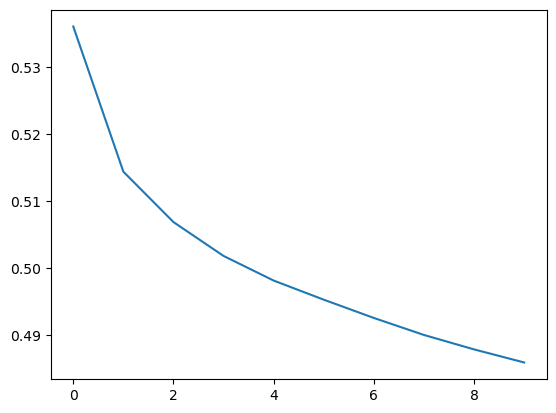

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

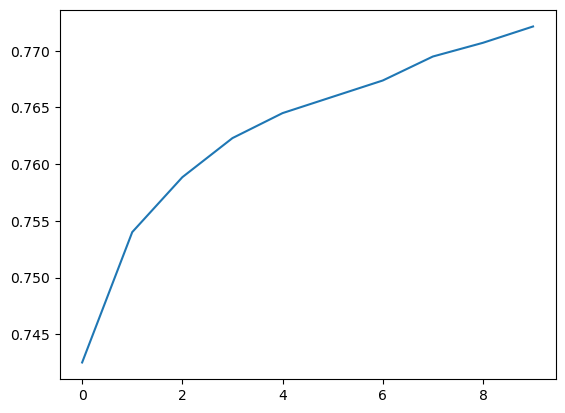

In [48]:
plt.plot(history.history['accuracy'])

In [49]:
y_pred = model.predict(X_test_transformed)

18750/18750 ━━━━━━━━━━━━━━━━━━━━ 12s 620us/step


In [50]:
y_pred.argmax(axis=1)

array([2, 1, 1, ..., 2, 1, 1], dtype=int64)

In [51]:
y_pred = y_pred.argmax(axis=1)

In [52]:
from sklearn.metrics import recall_score, classification_report

In [53]:
y_test = y_test - 1
y_test.value_counts()

Severity
1           390697
2           198678
0             7806
3             2819
Name: count, dtype: int64

In [54]:
print(classification_report(y_test, y_pred))

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7806
           1       0.84      0.82      0.83    390697
           2       0.66      0.73      0.70    198678
           3       0.55      0.02      0.04      2819

    accuracy                           0.77    600000
   macro avg       0.51      0.39      0.39    600000
weighted avg       0.77      0.77      0.77    600000



C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
